#### Importing Libraries

In [1]:
import pygame
import tensorflow as tf
import numpy as np
from tkinter import *
from tkinter import messagebox

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


#### Importing digit dataset

In [2]:
# Importing handwritten-digit dataset
mnist = tf.keras.datasets.mnist


#The MNIST database contains 60,000 training images and 10,000 testing images
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# Each image is of 28x28 pixels
print("size of each image in pixels : ", x_train[0].shape)

size of each image in pixels :  (28, 28)


#### visualizing random data

8


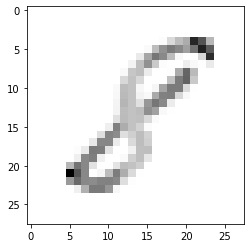

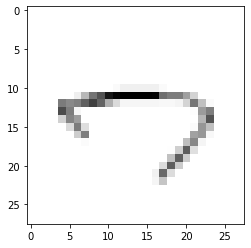

In [3]:
import matplotlib.pyplot as plt
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()
plt.imshow(x_train[image_index + image_index], cmap='Greys')
plt.show()

### Training the model

In [4]:
# converting into binary data
for train in range(len(x_train)):
    for row in range(28):
        for x in range(28):
            if x_train[train][row][x] != 0:
                x_train[train][row][x] = 1
print("going to trained")

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

print("optimizing")

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print("optimized now will fit")
model.fit(x_train, y_train, epochs=3)
#model.save('epic_num_reader.model')

print("done with the model")

going to trained
optimizing
optimized now will fit
Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 12s 206us/sample - loss: 0.2464 - accuracy: 0.9250
Epoch 2/3
60000/60000 [==============================] - 8s 126us/sample - loss: 0.1174 - accuracy: 0.9631
Epoch 3/3
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0828 - accuracy: 0.9735
done with the model


In [5]:
class pixel(object):
    def __init__(self, x, y, width, height):
        self.x = x
        self.y = y
        self.width = width
        self.height = height
        self.color = (255,255,255)
        self.neighbors = []

    def draw(self, surface):
        pygame.draw.rect(surface, self.color, (self.x, self.y, self.x + self.width, self.y + self.height))

    def getNeighbors(self, g):
        # Get the neighbours of each pixel in the grid, this is used for drawing thicker lines
        j = self.x // 20 # the var i is responsible for denoting the current col value in the grid
        i = self.y // 20 # the var j is responsible for denoting thr current row value in the grid
        rows = 28
        cols = 28

        # Horizontal and vertical neighbors
        if i < cols - 1:  # Right
            self.neighbors.append(g.pixels[i + 1][j])
        if i > 0:  # Left
            self.neighbors.append(g.pixels[i - 1][j])
        if j < rows - 1:  # Up
            self.neighbors.append(g.pixels[i][j + 1])
        if j > 0:  # Down
            self.neighbors.append(g.pixels[i][j - 1])

        # Diagonal neighbors
        if j > 0 and i > 0:  # Top Left
            self.neighbors.append(g.pixels[i - 1][j - 1])

        if j + 1 < rows and i > -1 and i - 1 > 0:  # Bottom Left
            self.neighbors.append(g.pixels[i - 1][j + 1])

        if j - 1 < rows and i < cols - 1 and j - 1 > 0:  # Top Right
            self.neighbors.append(g.pixels[i + 1][j - 1])

        if j < rows - 1 and i < cols - 1:  # Bottom Right
            self.neighbors.append(g.pixels[i + 1][j + 1])


In [6]:
class grid(object):
    pixels = []

    def __init__(self, row, col, width, height):
        self.rows = row
        self.cols = col
        self.len = row * col
        self.width = width
        self.height = height
        self.generatePixels()
        pass

    def draw(self, surface):
        for row in self.pixels:
            for col in row:
                col.draw(surface)

    def generatePixels(self):
        print("in generatePixels")
        x_gap = self.width // self.cols
        y_gap = self.height // self.rows
        self.pixels = []
        for r in range(self.rows):
            self.pixels.append([])
            for c in range(self.cols):
                self.pixels[r].append(pixel(x_gap * c, y_gap * r, x_gap, y_gap))

        for r in range(self.rows):
            for c in range(self.cols):
                self.pixels[r][c].getNeighbors(self)

    def clicked(self, pos): #Return the position in the grid that user clicked on
        try:
            t = pos[0]
            w = pos[1]
            g1 = int(t) // self.pixels[0][0].width
            g1 = int(t) // self.pixels[0][0].width
            g2 = int(w) // self.pixels[0][0].height

            return self.pixels[g2][g1]
        except:
            pass

    def convert_binary(self):
        print("in convert_binary")
        li = self.pixels

        newMatrix = [[] for x in range(len(li))]

        for i in range(len(li)):
            for j in range(len(li[i])):
                if li[i][j].color == (255,255,255):
                    newMatrix[i].append(0)
                else:
                    newMatrix[i].append(1)

        mnist = tf.keras.datasets.mnist
        (x_train, y_train), (x_test, y_test) = mnist.load_data()
        x_test = tf.keras.utils.normalize(x_test, axis=1)
        for row in range(28):
            for x in range(28):
                x_test[0][row][x] = newMatrix[row][x]

        return x_test[:1]


In [7]:
def guess(li):
    print("IN guess")
    
    predictions = model.predict(li)
    print(predictions[0])
    t = (np.argmax(predictions[0]))
    window = Tk()
    window.withdraw()
    messagebox.showinfo("Guesstimation : ", "Number drawn is : " + str(t))
    window.destroy()



In [8]:

def main():
    run = True
    print("In main")

    while run:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                print("Quit")
                run = False
            if event.type == pygame.MOUSEBUTTONUP:
                print("keydown")
                li = g.convert_binary()
                guess(li)
                g.generatePixels()
            if pygame.mouse.get_pressed()[0]:

                pos = pygame.mouse.get_pos()
                clicked = g.clicked(pos)
                clicked.color = (0,255,0)
                for n in clicked.neighbors:
                    n.color = (0,255,0)

            if pygame.mouse.get_pressed()[2]:
                try:
                    pos = pygame.mouse.get_pos()
                    clicked = g.clicked(pos)
                    clicked.color = (255,255,255)
                except:
                    pass

        g.draw(win)
        pygame.display.update()

In [9]:
pygame.init()
width = height = 560
win = pygame.display.set_mode((width, height))
pygame.display.set_caption("Guesstimator")
g = grid(28, 28, width, height)
main()


pygame.quit()


in generatePixels
In main
keydown
in convert_binary
IN guess
[2.2456162e-07 3.2235783e-09 6.2709653e-08 1.0393828e-06 5.5432483e-04
 1.4773840e-07 1.3013931e-09 3.1832107e-05 1.8115745e-05 9.9939430e-01]
in generatePixels
keydown
in convert_binary
IN guess
[1.8199001e-09 9.8223074e-10 2.8257789e-09 9.4669085e-06 5.8505989e-06
 1.1439976e-06 3.5843321e-11 4.8356897e-06 8.4035819e-06 9.9997032e-01]
in generatePixels
keydown
in convert_binary
IN guess
[3.4099241e-07 8.3464392e-06 6.7733461e-05 4.4504837e-03 2.6816211e-03
 2.9166102e-05 9.8650137e-09 2.8330777e-03 8.1254810e-04 9.8911673e-01]
in generatePixels
keydown
in convert_binary
IN guess
[1.1640023e-08 3.1728342e-10 6.1776793e-09 1.1092243e-06 6.1511375e-05
 6.9071029e-07 3.0856984e-10 1.4270683e-05 9.3168512e-07 9.9992144e-01]
in generatePixels
keydown
in convert_binary
IN guess
[1.6062180e-02 5.8613841e-07 1.7779482e-03 1.8066703e-04 1.1120588e-04
 7.5902462e-05 9.5601836e-06 5.9056273e-03 1.9606658e-04 9.7568023e-01]
in generateP